In [8]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [10]:
pd.set_option('display.max_columns',None)
dt=pd.read_excel(r'C:\Users\admin\Downloads\employee_burnout_analysis-AI.xlsx')
dt

Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      2008-09-30  Female      Service   
1          fffe3700360033003500      2008-11-30    Male      Service   
2      fffe31003300320037003900      2008-03-10  Female      Product   
3      fffe32003400380032003900      2008-11-03    Male      Service   
4      fffe31003900340031003600      2008-07-24  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No            2                  3.0   
1                     Yes            1                  2.0   
2                     Yes            2                  NaN   
3                     Yes            1                  1.0   
4                      No            3                  7.0   
...                   ...          ...                  ...   
22745                  No            1                  3.0   
22746                 Yes            3                  6.0   
22747                 Yes            3                  7.0   
22748                  No            2                  5.0   
22749                  No            3                  6.0   

       Mental Fatigue Score  Burn Rate  
0                       3.8       0.16  
1                       5.0       0.36  
2                       5.8       0.49  
3                       2.6       0.20  
4                       6.9       0.52  
...                     ...        ...  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61  

[22750 rows x 9 columns]

In [11]:
dt["Date of Joining"]=pd.to_datetime(dt["Date of Joining"])

In [12]:
dt.shape


(22750, 9)

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [13]:
dt.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   
4                  No            3                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4       0.52

In [14]:
dt.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [15]:
dt.isna().sum()


Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [16]:
dt.duplicated().sum()

0

In [17]:
dt.describe()

Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

In [16]:
intFloatdt=dt.select_dtypes([np.int64,np.float64])
for i,col in enumerate(intFloatdt.columns):
  if (intFloatdt[col].skew()>=0.1):
    print("\n",col,"feature is positively skewed and value is:",intFloatdt[col].skew())
  elif (intFloatdt[col].skew()<=-0.1):
    print("\n",col,"feature is Negatively skewed and value is:",intFloatdt[col].skew())
  else:
    print("\n",col,"feature is Normally Distributed and value is:",intFloatdt[col].skew())



 Designation feature is Normally Distributed and value is: 0.09242138478903683

 Resource Allocation feature is positively skewed and value is: 0.20457273454318103

 Mental Fatigue Score feature is Negatively skewed and value is: -0.4308950578815428

 Burn Rate feature is Normally Distributed and value is: 0.045737370909640515


In [17]:
dt['Resource Allocation'].fillna(dt['Resource Allocation'].mean(),inplace=True)
dt['Mental Fatigue Score'].fillna(dt['Mental Fatigue Score'].mean(),inplace=True)
dt['Burn Rate'].fillna(dt['Burn Rate'].mean(),inplace=True)


In [18]:
dt.isna().sum()


Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [19]:
dt.corr()

Designation  Resource Allocation  Mental Fatigue Score  \
Designation              1.000000             0.878459              0.690983   
Resource Allocation      0.878459             1.000000              0.799662   
Mental Fatigue Score     0.690983             0.799662              1.000000   
Burn Rate                0.737556             0.856278              0.944546   

                      Burn Rate  
Designation            0.737556  
Resource Allocation    0.856278  
Mental Fatigue Score   0.944546  
Burn Rate              1.000000

In [23]:
Corr=dt.corr()
sns.set(rc={'figure.figsize':(14,12)})
fig=px.imshow(Corr,text_auto=True,aspect='auto')
fig.show()


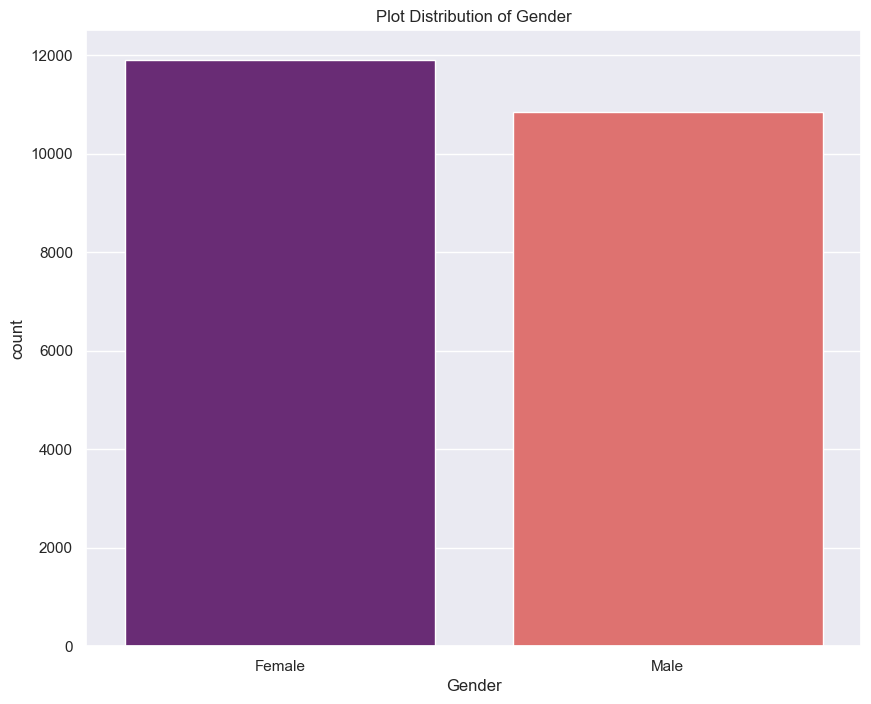

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data=dt,palette="magma")
plt.title("Plot Distribution of Gender")
plt.show()

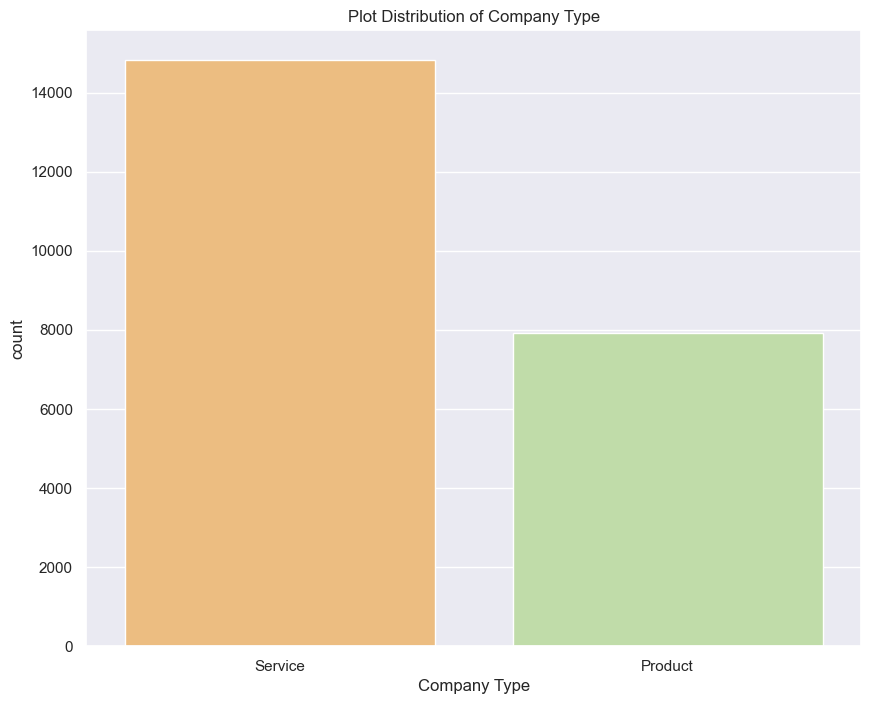

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type",data=dt,palette="Spectral")
plt.title("Plot Distribution of Company Type")
plt.show()

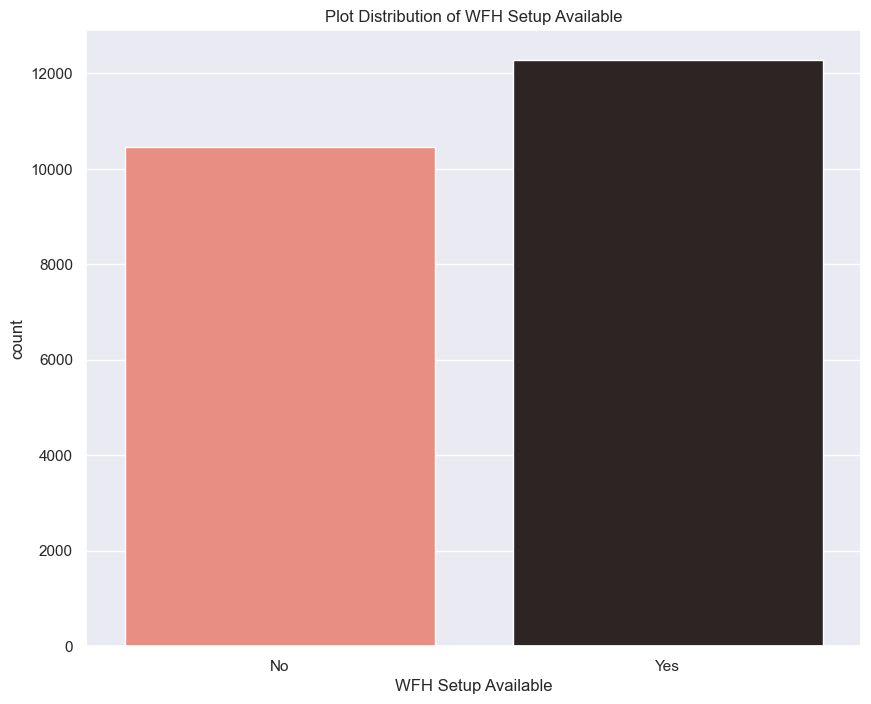

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available",data=dt,palette="dark:salmon_r")
plt.title("Plot Distribution of WFH Setup Available")
plt.show()

In [26]:
burn_st=dt.loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int,float])
for i,col in enumerate(burn_st.columns):
  fig=px.histogram(burn_st,x=col,title="Plot Distribution of "+col,color_discrete_sequence=['indianred'])
  fig.update_layout(bargap=0.2)
  fig.show()

In [27]:
fig=px.line(dt,y="Burn Rate",color="Designation",title="Burn rate on the Basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()


In [28]:
fig=px.line(dt,y="Burn Rate",color="Gender",title="Burn rate on the Basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [29]:
fig=px.line(dt,y="Mental Fatigue Score",color="Designation",title="Mental Fatigue Score Vs Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()


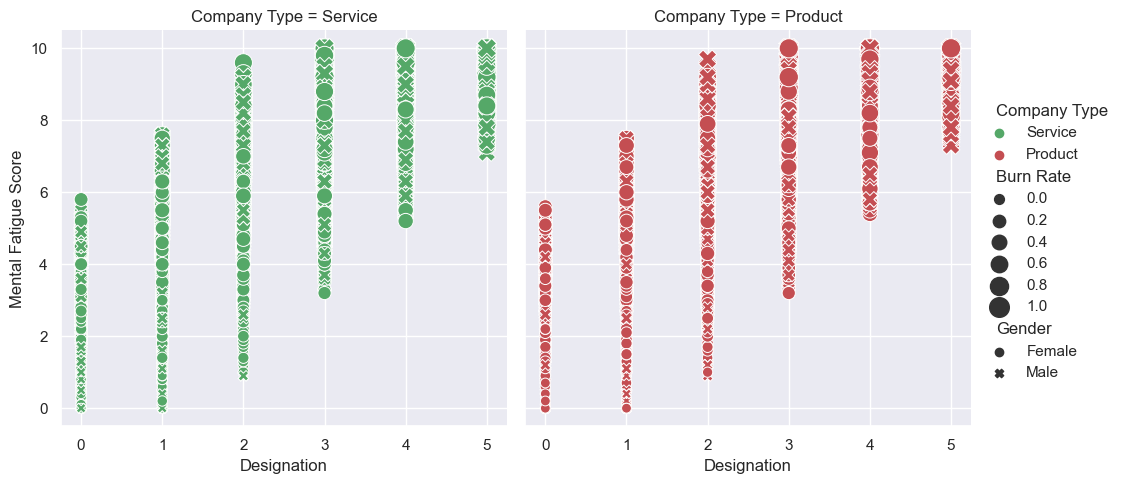

In [30]:
sns.relplot(
    data=dt, x="Designation", y="Mental Fatigue Score", col="Company Type",
    hue="Company Type", size="Burn Rate", style="Gender",
    palette=["g","r"],sizes=(50,200)
)

In [31]:
from sklearn import preprocessing
Label_encode=preprocessing.LabelEncoder()

In [32]:
dt['GenderLabel']=Label_encode.fit_transform(dt['Gender'].values)
dt['Company_TypeLabel']=Label_encode.fit_transform(dt['Company Type'].values)
dt['WFH_Setup_AvailableLabel']=Label_encode.fit_transform(dt['WFH Setup Available'].values)


In [33]:
gn=dt.groupby('Gender')
gn=gn['GenderLabel']
gn.first()


Gender
Female    0
Male      1
Name: GenderLabel, dtype: int32

In [34]:
gn=dt.groupby('Company Type')
gn=gn['Company_TypeLabel']
gn.first()


Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int32

In [35]:
gn=dt.groupby('WFH Setup Available')
gn=gn['WFH_Setup_AvailableLabel']
gn.first()

dt.tail(10)

Employee ID Date of Joining  Gender Company Type  \
22740  fffe33003300380031003100      2008-09-05  Female      Product   
22741  fffe31003600350034003800      2008-01-07    Male      Product   
22742  fffe33003200310039003000      2008-07-28    Male      Product   
22743      fffe3300390030003600      2008-12-15  Female      Product   
22744  fffe32003500370033003200      2008-05-27    Male      Product   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
22740                  No            3                  6.0   
22741                  No            2                  5.0   
22742                  No            3                  5.0   
22743                 Yes            1                  3.0   
22744                  No            3                  7.0   
22745                  No            1                  3.0   
22746                 Yes            3                  6.0   
22747                 Yes            3                  7.0   
22748                  No            2                  5.0   
22749                  No            3                  6.0   

       Mental Fatigue Score  Burn Rate  GenderLabel  Company_TypeLabel  \
22740                   7.3       0.55            0                  0   
22741                   6.0        NaN            1                  0   
22742                   8.1       0.69            1                  0   
22743                   6.0       0.48            0                  0   
22744                   6.2       0.54            1                  0   
22745                   NaN       0.41            0                  1   
22746                   6.7       0.59            0                  0   
22747                   NaN       0.72            1                  1   
22748                   5.9       0.52            0                  1   
22749                   7.8       0.61            1                  0   

       WFH_Setup_AvailableLabel  
22740                         0  
22741                         0  
22742                         0  
22743                         1  
22744                         0  
22745                         0  
22746                         1  
22747                         1  
22748                         0  
22749                         0

In [34]:
cols=['Designation','Resource Allocation','Mental Fatigue Score',
      'GenderLabel','Company_TypeLabel','WFH_Setup_AvailableLabel']
x=dt[cols]
y=dt['Burn Rate']

print(x)

print(y)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company_TypeLabel  WFH_Setup_AvailableLabel  
0         

In [35]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(x)
print("PCA shape of X is: ",x_pca.shape,"and original shape is: ",x.shape)
print("% of Importance of Selected Features is: ",pca.explained_variance_ratio_)
print("The number of features selected through PCA is: ",pca.n_components_)


PCA shape of X is:  (22750, 4) and original shape is:  (22750, 6)
% of Importance of Selected Features is:  [0.78371089 0.11113597 0.03044541 0.02632422]
The number of features selected through PCA is:  4


In [36]:
from sklearn.model_selection import train_test_split
x_train_pca,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25,random_state=10)

In [37]:
print(x_train_pca.shape,x_test.shape,y_train.shape,y_test.shape)


(17062, 4) (5688, 4) (17062,) (5688,)


In [38]:
from sklearn.metrics import r2_score


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming x_train_pca, y_train, x_test, and y_test are already defined

# Initialize and fit the model
rf_model = RandomForestRegressor()
rf_model.fit(x_train_pca, y_train)

# Make predictions on training data and calculate R-squared
train_pred_rf = rf_model.predict(x_train_pca)
train_r2 = r2_score(y_train, train_pred_rf)

# Make predictions on test data and calculate R-squared
test_pred_rf = rf_model.predict(x_test)
test_r2 = r2_score(y_test, test_pred_rf)

# Accuracy Score
print("Accuracy Score of Train Data: " + str(round(100 * train_r2, 4)) + " %")
print("Accuracy Score of Test Data: " + str(round(100 * test_r2, 4)) + " %")
print("RandomForestRegressor Performance Metrics\n")

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Accuracy Score of Train Data: 91.1859 %
Accuracy Score of Test Data: 83.92 %
RandomForestRegressor Performance Metrics

Mean Squared Error: 0.005929814862965252
Root Mean Squared Error: 0.07700529113616318
Mean Absolute Error: 0.056525140794273995
R-squared Score: 0.8392004713100146


In [43]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming x_train_pca, y_train, x_test, and y_test are already defined

# Initialize and fit the model
abr_model = AdaBoostRegressor()
abr_model.fit(x_train_pca, y_train)

# Make predictions on training data and calculate R-squared
train_pred_adaboost = abr_model.predict(x_train_pca)
train_r2 = r2_score(y_train, train_pred_adaboost)

# Make predictions on test data and calculate R-squared
test_pred_adaboost = abr_model.predict(x_test)
test_r2 = r2_score(y_test, test_pred_adaboost)

# Accuracy Score
print("Accuracy Score of Train Data: " + str(round(100 * train_r2, 4)) + " %")
print("Accuracy Score of Test Data: " + str(round(100 * test_r2, 4)) + " %")
print("AdaBoostRegressor Performance Metrics\n")

# Make predictions on the test set
y_pred = abr_model.predict(x_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Accuracy Score of Train Data: 77.6151 %
Accuracy Score of Test Data: 77.1881 %
AdaBoostRegressor Performance Metrics

Mean Squared Error: 0.008412346385242015
Root Mean Squared Error: 0.09171884422103244
Mean Absolute Error: 0.07266328008357206
R-squared Score: 0.7718813546149418
